<a href="https://colab.research.google.com/github/vimanshu/ML/blob/main/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# feature engineering -- 75% of ML
# one hot encoding
# binning trick
# realize and know your data
# visulize debug and monitor
# feature engineering means transforming raw data into a feature vector


In [2]:
# mapping categorical values
# since model can't be multiplied b y the learned weight
# feature engineering to convert string to numeric values
# to come out of the problems from indexing string we 
# do something called one hot encoding 
# sparse representation i which only true value is stored
# sacling can be done using z scores
# making lograthmic scaling
# 

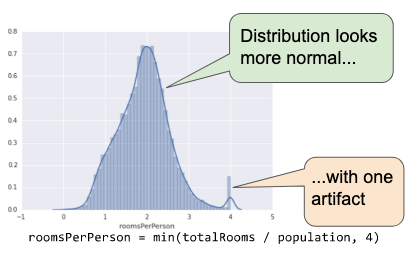

In [3]:
# and the use of clipping helps
# in the above fig clipping at 4 means all the values after 4 remains same doesn't change


In [4]:
# The concept of binning
# creating distinct boolean features
# for ex binning the latitude
# latitudeBin1=32<latitude<=33
# LatitudeBin6= 37<latitude<=38
# creating distinct boolena feature is inefficient so uniting them
# into a single vector makes more sense
# thanks to binning, our model can now learn completely different weights for each latitude
# another efficient way is to use "bin by quantile"

In [5]:
# learn about the scrubbing 
# these includes examples of ommited values, duplicate examples
# bad labels, bad feature values
# use of histogram is a great way to viualize the data in the aggregrate.
# use of following stats are very helpful for ex- max and min, mean and median, std deviation
